In [1]:
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os


In [2]:
# 读取 CSV 文件
train_df = pd.read_csv('./data/train.csv')

train_df

,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera
...,...,...
18348,images/18348.jpg,aesculus_glabra
18349,images/18349.jpg,liquidambar_styraciflua
18350,images/18350.jpg,cedrus_libani
18351,images/18351.jpg,prunus_pensylvanica


In [3]:
# ./ 代表当前目录
# ../ 代表当前目录的上一级目录
# ../ ../ 表示退出两级目录
root_dir = "./data/images" # ../表示返回上一级目录
img_path = os.listdir(root_dir )
print(img_path)

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '1001.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '1006

In [4]:
class LeafDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)  # 读取 CSV 文件
        self.root_dir = root_dir  # 图像文件夹路径
        self.transform = transform  # 图像预处理

        # 创建标签到数值的映射
        self.label_to_index = {label: idx for idx, label in enumerate(self.annotations.iloc[:, 1].unique())}
    
    def __len__(self):
        return len(self.annotations)  # 返回数据集大小

    def __getitem__(self, idx):
        # 从 annotations 中获取文件名，并移除前缀 'images/'
        img_name_in_csv = self.annotations.iloc[idx, 0].replace('images/', '')
        
        # 拼接完整路径
        img_name = os.path.join(self.root_dir, img_name_in_csv)
        
        image = Image.open(img_name).convert('RGB')  # 读取图像

        # 获取字符串标签并转换为数值标签
        label_str = self.annotations.iloc[idx, 1]
        label = self.label_to_index[label_str]

        if self.transform:
            image = self.transform(image)  # 应用预处理

        return image, label




In [5]:
# 定义图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为张量
])

dataset = LeafDataset(csv_file='./data/train.csv', 
                      root_dir='./data/images', 
                      transform=transform)




In [6]:
len(list(dataset.label_to_index.keys())) # 查看一共有多少类

176

In [7]:
# dataset[0][1] 为编码标签
# 通过将字典的键转为文本标签列表，进行索引访问
dataset[0][0],list(dataset.label_to_index.keys())[dataset[0][1]]

(tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
 
         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],
 
         [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ...,

In [8]:
import json

# 提取标签映射
label_mapping = list(dataset.label_to_index.keys())

# 打印标签映射，检查是否正确
print(label_mapping)

# 保存标签映射到文件中，例如 JSON 文件
import json
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)


['maclura_pomifera', 'ulmus_rubra', 'broussonettia_papyrifera', 'prunus_virginiana', 'acer_rubrum', 'cryptomeria_japonica', 'staphylea_trifolia', 'asimina_triloba', 'diospyros_virginiana', 'tilia_cordata', 'ulmus_pumila', 'quercus_muehlenbergii', 'juglans_cinerea', 'cercis_canadensis', 'ptelea_trifoliata', 'acer_palmatum', 'catalpa_speciosa', 'abies_concolor', 'eucommia_ulmoides', 'quercus_montana', 'koelreuteria_paniculata', 'liriodendron_tulipifera', 'styrax_japonica', 'malus_pumila', 'prunus_sargentii', 'cornus_mas', 'magnolia_virginiana', 'ostrya_virginiana', 'magnolia_acuminata', 'ilex_opaca', 'acer_negundo', 'fraxinus_nigra', 'pyrus_calleryana', 'picea_abies', 'chionanthus_virginicus', 'carpinus_caroliniana', 'zelkova_serrata', 'aesculus_pavi', 'taxodium_distichum', 'carya_tomentosa', 'picea_pungens', 'carya_glabra', 'quercus_macrocarpa', 'carya_cordiformis', 'catalpa_bignonioides', 'tsuga_canadensis', 'populus_tremuloides', 'magnolia_denudata', 'crataegus_viridis', 'populus_delt

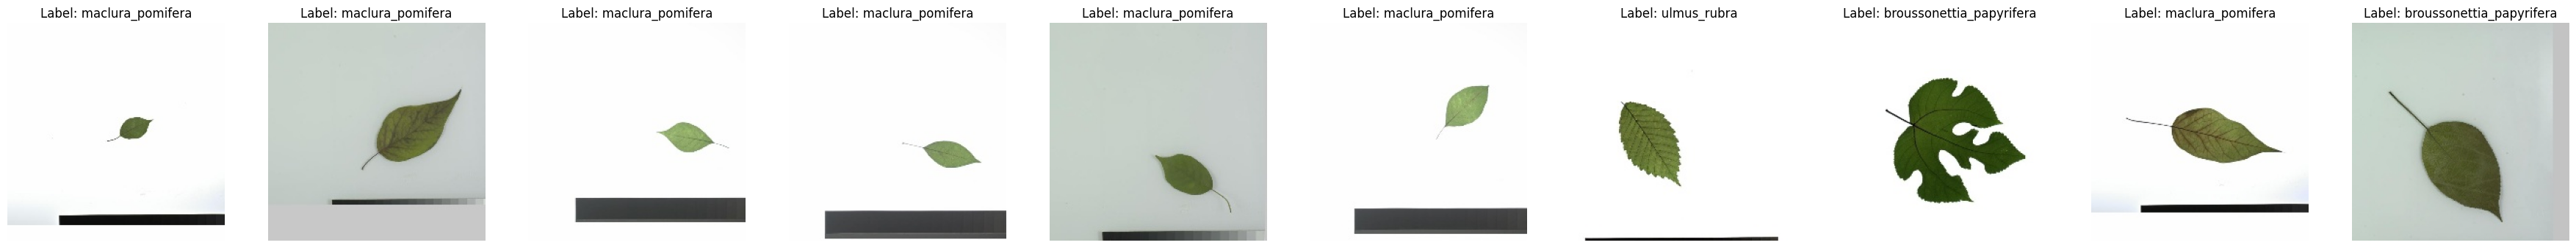

In [9]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# 显示图像和标签的函数
def show_images(dataset, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(45, 15))
    for i in range(num_images):
        image, label = dataset[i]
        axes[i].imshow(ToPILImage()(image))  # 将张量转换为 PIL 图像
        axes[i].set_title(f'Label: {list(dataset.label_to_index.keys())[label]}')
        axes[i].axis('off')  # 不显示坐标轴

    plt.show()

# 显示前10张图像和标签
show_images(dataset, num_images=10)


In [10]:
from torch.utils.data import random_split

# 定义数据集和划分比例
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)  #70% 用于训练
test_size = dataset_size - train_size  # 剩余 30% 用于测试

# 使用 random_split 划分数据集
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 示例输出划分后的数据集大小
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Training dataset size: 12847
Test dataset size: 5506


In [11]:
# 设置装载器
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    """一个基本的残差块，用于 ResNet-18 和 ResNet-34"""
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def resnet18(num_classes=1000):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = resnet18(num_classes=176).to(device)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
import time
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs')
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
# 目前会用的优化器SGD Adam

def train(model, device, train_dataloader, criterion, optimizer, epoch):
    model.train()  # 设置为训练模式
    train_loss_epoch = 0
    total_train_accuracy = 0
    total_train_worry = 0
    total_samples = 0
    
    start_time = time.time()  # 记录训练开始时间
    
    for data in train_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item()
        
        preds = outputs.argmax(dim=1)
        correct = (preds == labels).sum().item()
        worry = (preds != labels).sum().item()
        total_train_accuracy += correct
        total_train_worry += worry
        
    end_time = time.time()  # 记录训练结束时间
    time_elapsed = end_time - start_time  # 计算时间差
    num_batches = len(train_dataloader)  # 计算批次数
    samples_per_second = (len(train_dataset) * 1.0) / time_elapsed  # 计算每秒处理的样本数
    
    total_samples = total_train_accuracy + total_train_worry
    avg_train_accuracy = total_train_accuracy / total_samples
    avg_train_loss = train_loss_epoch / len(train_dataloader)  # 使用 batch 数计算平均损失
    
    
    writer.add_scalar('Loss/Train', avg_train_loss, epoch+1)
    writer.add_scalar('Accuracy/Train', avg_train_accuracy, epoch+1)
   
    
    print("--------------------------------------------------------")
    print("Train---Epoch {}, Loss: {}, Accuracy:{}, Samples per Second: {:.2f}".format(epoch, avg_train_loss, avg_train_accuracy, samples_per_second))

def test(model, device, test_dataloader, criterion,epoch):
    model.eval()  # 设置为评估模式
    test_loss_epoch = 0
    total_test_accuracy = 0
    total_test_worry = 0
    total_samples = 0
    
    start_time = time.time()  # 记录测试开始时间
    
    with torch.no_grad(): 
        for data in test_dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            test_loss_epoch += loss.item()
            
            preds = outputs.argmax(dim=1)
            correct = (preds == labels).sum().item()
            worry = (preds != labels).sum().item()
            total_test_accuracy += correct
            total_test_worry += worry
    
    end_time = time.time()  # 记录测试结束时间
    time_elapsed = end_time - start_time  # 计算时间差
    num_batches = len(test_dataloader)  # 计算批次数
    samples_per_second = (len(test_dataset) * 1.0) / time_elapsed  # 计算每秒处理的样本数
    
    total_samples = total_test_accuracy + total_test_worry
    avg_test_accuracy = total_test_accuracy / total_samples
    avg_test_loss = test_loss_epoch / len(test_dataloader)  # 使用 batch 数计算平均损失
    
    writer.add_scalar('Loss/Test', avg_test_loss, epoch+1)
    writer.add_scalar('Accuracy/Test', avg_test_accuracy, epoch+1)
    
    print("Test---Epoch {}, Loss: {}, Accuracy:{}, Samples per Second: {:.2f}".format(epoch, avg_test_loss, avg_test_accuracy, samples_per_second))

for epoch in range(1, 21):
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion,epoch)

KeyboardInterrupt: 

In [ ]:
for epoch in range(21, 41): # 接着训练
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion,epoch)

In [ ]:
for epoch in range(41, 51): # 接着训练
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion,epoch)

In [ ]:
for epoch in range(51, 56): # 接着训练
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion,epoch)

In [ ]:
for epoch in range(56, 61): # 接着训练
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion,epoch)

In [ ]:
 # 保存模型
model_path = "model.pth"  # 保存路径，文件名包含 epoch 数字
torch.save(model.state_dict(), model_path)  # 保存模型的状态字典
print(f"模型已保存: {model_path}")

# RestNet50

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Bottleneck(nn.Module):
    """Bottleneck 残差块，用于 ResNet-50、ResNet-101 和 ResNet-152"""
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def resnet50(num_classes=1000):
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 示例：创建一个 ResNet-50 模型
model = resnet50(num_classes=176).to(device)  # 假设有 10 个类别
print(model)


In [ ]:
import time
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs_1')
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
# 目前会用的优化器SGD Adam

def train(model, device, train_dataloader, criterion, optimizer, epoch):
    model.train()  # 设置为训练模式
    train_loss_epoch = 0
    total_train_accuracy = 0
    total_train_worry = 0
    total_samples = 0
    
    start_time = time.time()  # 记录训练开始时间
    
    for data in train_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item()
        
        preds = outputs.argmax(dim=1)
        correct = (preds == labels).sum().item()
        worry = (preds != labels).sum().item()
        total_train_accuracy += correct
        total_train_worry += worry
        
    end_time = time.time()  # 记录训练结束时间
    time_elapsed = end_time - start_time  # 计算时间差
    num_batches = len(train_dataloader)  # 计算批次数
    samples_per_second = (len(train_dataset) * 1.0) / time_elapsed  # 计算每秒处理的样本数
    
    total_samples = total_train_accuracy + total_train_worry
    avg_train_accuracy = total_train_accuracy / total_samples
    avg_train_loss = train_loss_epoch / len(train_dataloader)  # 使用 batch 数计算平均损失
    
    
    writer.add_scalar('Loss/Train', avg_train_loss, epoch+1)
    writer.add_scalar('Accuracy/Train', avg_train_accuracy, epoch+1)
   
    
    print("--------------------------------------------------------")
    print("Train---Epoch {}, Loss: {}, Accuracy:{}, Samples per Second: {:.2f}".format(epoch, avg_train_loss, avg_train_accuracy, samples_per_second))

def test(model, device, test_dataloader, criterion):
    model.eval()  # 设置为评估模式
    test_loss_epoch = 0
    total_test_accuracy = 0
    total_test_worry = 0
    total_samples = 0
    
    start_time = time.time()  # 记录测试开始时间
    
    with torch.no_grad(): 
        for data in test_dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            test_loss_epoch += loss.item()
            
            preds = outputs.argmax(dim=1)
            correct = (preds == labels).sum().item()
            worry = (preds != labels).sum().item()
            total_test_accuracy += correct
            total_test_worry += worry
    
    end_time = time.time()  # 记录测试结束时间
    time_elapsed = end_time - start_time  # 计算时间差
    num_batches = len(test_dataloader)  # 计算批次数
    samples_per_second = (len(test_dataset) * 1.0) / time_elapsed  # 计算每秒处理的样本数
    
    total_samples = total_test_accuracy + total_test_worry
    avg_test_accuracy = total_test_accuracy / total_samples
    avg_test_loss = test_loss_epoch / len(test_dataloader)  # 使用 batch 数计算平均损失
    
    writer.add_scalar('Loss/Test', avg_test_loss, epoch+1)
    writer.add_scalar('Accuracy/Test', avg_test_accuracy, epoch+1)
    
    print("Test---Epoch {}, Loss: {}, Accuracy:{}, Samples per Second: {:.2f}".format(epoch, avg_test_loss, avg_test_accuracy, samples_per_second))

for epoch in range(1, 51):
    train(model, device, train_dataloader, criterion, optimizer, epoch)
    test(model, device, test_dataloader, criterion)